## Mispriced Diamonds Dataset

By Magnus Aghe

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn-v0_8")

warnings.filterwarnings("ignore")

### Ingesting and Exploring the Dataset

In [2]:
# Display settings

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Loading the dataset


diamonds_df = pd.read_csv("P2-Mispriced-Diamonds.csv")

In [4]:
diamonds_df.shape

(53940, 3)

In [5]:
# Listing the column names

diamonds_df.columns

Index(['carat', 'clarity', 'price'], dtype='object')

In [6]:
diamonds_df.info

<bound method DataFrame.info of        carat clarity  price
0       0.23     SI2    326
1       0.21     SI1    326
2       0.23     VS1    327
3       0.29     VS2    334
4       0.31     SI2    335
...      ...     ...    ...
53935   0.72     SI1   2757
53936   0.72     SI1   2757
53937   0.70     SI1   2757
53938   0.86     SI2   2757
53939   0.75     SI2   2757

[53940 rows x 3 columns]>

In [7]:
diamonds_df.head()

,carat,clarity,price
0,0.23,SI2,326
1,0.21,SI1,326
2,0.23,VS1,327
3,0.29,VS2,334
4,0.31,SI2,335


In [8]:
diamonds_df.tail()

,carat,clarity,price
53935,0.72,SI1,2757
53936,0.72,SI1,2757
53937,0.70,SI1,2757
53938,0.86,SI2,2757
53939,0.75,SI2,2757


In [9]:
diamonds_df.dtypes

carat      float64
clarity     object
price        int64
dtype: object

In [10]:
# Missing values
diamonds_df.isna().sum()

carat      0
clarity    0
price      0
dtype: int64

In [11]:
print(f"Dataset shape :{diamonds_df.shape}\n")

# Getting a dataframe of features, data type, proportion of missing and unique values

missing_values = diamonds_df.isnull().sum()
percentage_missing = (missing_values / len(diamonds_df)) * 100
unique_values = diamonds_df.nunique() 
summary_df = print(pd.DataFrame({'Data_type': diamonds_df.dtypes,'Missing': missing_values, '%_Missing': percentage_missing, 'Unique_values': unique_values}))

print(summary_df)

Dataset shape :(53940, 3)

        Data_type  Missing  %_Missing  Unique_values
carat     float64        0       0.00            273
clarity    object        0       0.00              8
price       int64        0       0.00          11602
None


In this Mispriced Diamonds dataset, there are no missing values and there are 8 unique types of clarity diamonds, which should be converted to a categorical feature for further exploration.

### Data Cleaning

In [12]:
# To ensure data consistency, we standardize data types.

diamonds_df['carat'] = diamonds_df['carat'].astype(float)
diamonds_df['price'] = diamonds_df['price'].astype(float)
diamonds_df['clarity'] = diamonds_df['clarity'].astype('category')

In [13]:
#Checking data types

diamonds_df.dtypes

carat       float64
clarity    category
price       float64
dtype: object

In [14]:
# To check if exact duplicate records exist

diamonds_df.duplicated().any()

np.True_

In [15]:
# Counting total number of exact duplicates

exact_dupes = diamonds_df.duplicated().sum()
exact_dupes

np.int64(20584)

In [16]:
# Proportion of dataset that are duplicates

exact_dupes = diamonds_df[diamonds_df.duplicated()]
pct_exact_dupes = len(exact_dupes) / len(diamonds_df) * 100
f"{pct_exact_dupes:.2f}%"

'38.16%'

20,584 records representing 38.16% of the mispriced diamonds dataset are exact duplicates. 

We intentionally do not remove these duplicates because in the context of diamond pricing data, identical combinations of carat, clarity and price can represent legitimate distinct diamonds rather than ingestion errors. Removing these records could bias frequency-based analyses and mispricing detection.

### Summary Statistics

In [17]:
# Numeric summary grouped by clarity

summary_stats = (
    diamonds_df
    .groupby('clarity')
    .agg(
        mean_price=('price', 'mean'),
        median_price=('price', 'median'),
        std_price=('price', 'std'),
        mean_carat=('carat', 'mean'),
        median_carat=('carat', 'median'),
        std_carat=('carat', 'std'),
        max_price=('price', 'max'),
        min_price=('price', 'min'),
        max_carat=('carat', 'max'),
        min_carat=('carat', 'min')
    )
    .reset_index()
    .sort_values(by='median_price', ascending=False)
)

summary_stats

,clarity,mean_price,median_price,std_price,mean_carat,median_carat,std_carat,max_price,min_price,max_carat,min_carat
3,SI2,5063.03,4072.00,4260.46,1.08,1.01,0.52,18804.00,326.00,3.04,0.20
0,I1,3924.17,3344.00,2806.78,1.28,1.12,0.63,18531.00,345.00,5.01,0.30
2,SI1,3996.00,2822.00,3799.48,0.85,0.76,0.45,18818.00,326.00,2.57,0.21
5,VS2,3924.99,2054.00,4042.30,0.76,0.63,0.45,18823.00,334.00,3.51,0.20
4,VS1,3839.46,2005.00,4011.75,0.73,0.57,0.42,18795.00,327.00,2.59,0.23
7,VVS2,3283.74,1311.00,3821.65,0.60,0.44,0.36,18768.00,336.00,2.07,0.23
6,VVS1,2523.11,1093.00,3334.84,0.50,0.39,0.30,18777.00,336.00,2.31,0.23
1,IF,2864.84,1080.00,3920.25,0.51,0.35,0.31,18806.00,369.00,2.29,0.23


Grouping the dataset by clarity and computing central tendency and dispersion metrics, SI2 is the most expensive diamond clarity category with a mean price of $5,063 (median = $4,072) with a mean carat size of 1.08 (median = 1.01). Apparently, the mean and median price is determined by both the clarity level and carat size of each diamond. 

The structural pattern in the dataset is low clarity diamonds (SI2, I1, SI1) tend to have larger carat sizes (big stones), and high clarity diamonds (IF, VVS1, VVS2) tend to have smaller carat sizes (small stones).

Closely looking at the standard deviations, we see that they are often comparable to and even exceed the means, suggesting the presence of extreme values, nonlinear pricing effects, and overlapping distributions across clarity grades.

This tells us that clarity alone is not sufficient to explain pricing behavior in this dataset.

In [18]:
# Getting actual counts and percentages of clarity categories

clarity_summary = (
    diamonds_df["clarity"]
    .value_counts()
    .reset_index()
)

clarity_summary.columns = ["clarity", "count"]

clarity_summary["percent"] = (
    clarity_summary["count"] / len(diamonds_df) * 100
)

clarity_summary

,clarity,count,percent
0,SI1,13065,24.22
1,VS2,12258,22.73
2,SI2,9194,17.04
3,VS1,8171,15.15
4,VVS2,5066,9.39
5,VVS1,3655,6.78
6,IF,1790,3.32
7,I1,741,1.37


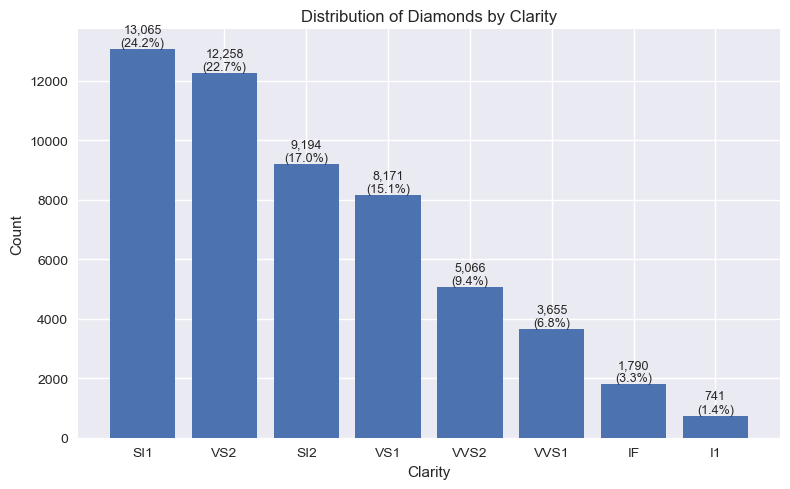

In [19]:
plt.figure(figsize=(8, 5))

bars = plt.bar(
    clarity_summary["clarity"],
    clarity_summary["count"]
)

plt.title("Distribution of Diamonds by Clarity")
plt.xlabel("Clarity")
plt.ylabel("Count")

# Add labels on bars
for bar, pct in zip(bars, clarity_summary["percent"]):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:,}\n({pct:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()

### Exploratory Visualizations

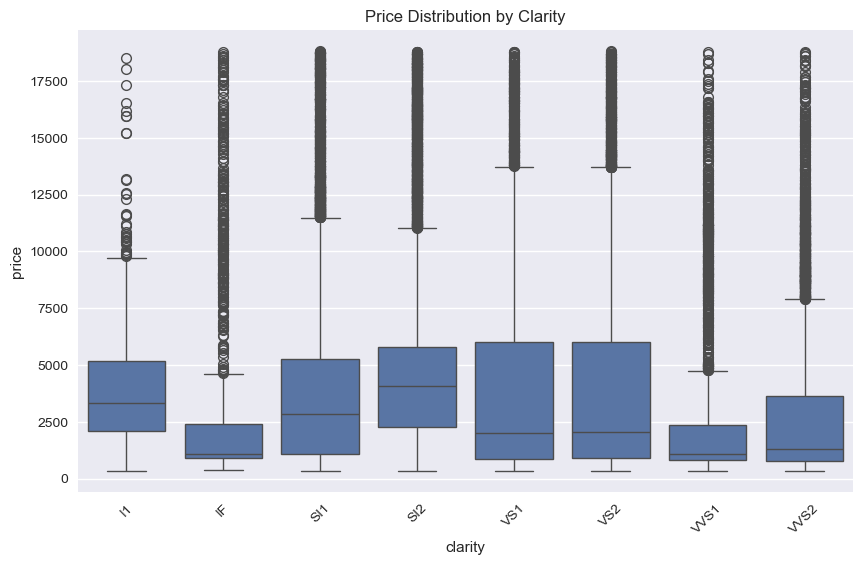

In [20]:
# Plotting the quantiles and outliers for each of the categorical values

# Boxplots for price by clarity

plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=diamonds_df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Clarity')
plt.show()

The boxplot shows substantial overlap and dispersion in prices across all clarity grades, indicating that clarity alone is not a dominant pricing determinant.

Median prices rise with clarity, but mid-tier groups (SI1, SI2, VS1, VS2) show wide spreads, indicating inconsistent pricing. High-clarity categories (IF, VVS1, VVS2) have tighter distributions, suggesting more stable and predictable pricing.

Numerous outliers across clarity levels highlight potential mispriced diamonds worth deeper investigation.

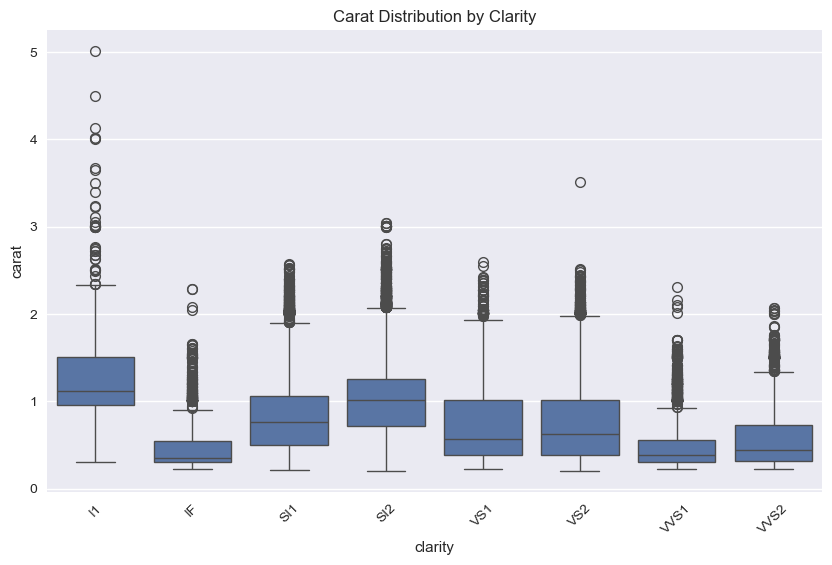

In [21]:
# Boxplots for carat by clarity

plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='carat', data=diamonds_df)
plt.xticks(rotation=45)
plt.title('Carat Distribution by Clarity')
plt.show()

Lower clarity groups (I1, SI2) show larger and more variable carat sizes, while high-clarity groups (IF, VVS1, VVS2) cluster around smaller carat sizes.

Wide IQRs in mid-tier clarities (SI1, SI2, VS1, VS2) indicate inconsistent size distributions within these categories.

Numerous high-carat outliers in lower clarities suggest potential candidates for underpricingrelative to clarity expectations.

In [22]:
# Removing outliers per clarity (IQR method)

def remove_outliers_iqr(data, group_col, value_col):
    def iqr_filter(group):
        Q1 = group[value_col].quantile(0.25)
        Q3 = group[value_col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        return group[(group[value_col] >= lower) & (group[value_col] <= upper)]

    return data.groupby(group_col, group_keys=False).apply(iqr_filter)

In [23]:
# New filtered Dataset without outliers

diamonds_df_filtered = remove_outliers_iqr(diamonds_df, 'clarity', 'price')
diamonds_df_filtered = remove_outliers_iqr(diamonds_df_filtered, 'clarity', 'carat')

diamonds_df_filtered.shape

(48564, 3)

In [24]:
# Proportion of filtered dataset to original dataset

exact_filtered = len(diamonds_df_filtered) / len(diamonds_df) * 100

f"{exact_filtered:.2f}%"

'90.03%'

Approximately 90% of observations were retained after clarity-specific outlier filtering, indicating that extreme values were limited and that filtering improved interpretability without distorting the dataset.

### Relationships in Filtered Data

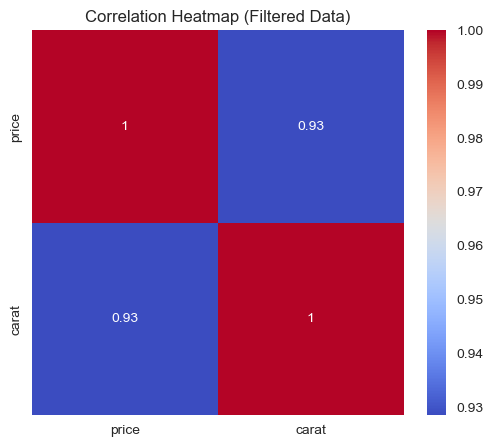

In [25]:
# Correlation heatmap for filtered data

plt.figure(figsize=(6, 5))
sns.heatmap(
    diamonds_df_filtered[["price", "carat"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap (Filtered Data)")
plt.show()

Carat and price show a very strong positive correlation (0.93), confirming that carat is the dominant driver of diamond value.

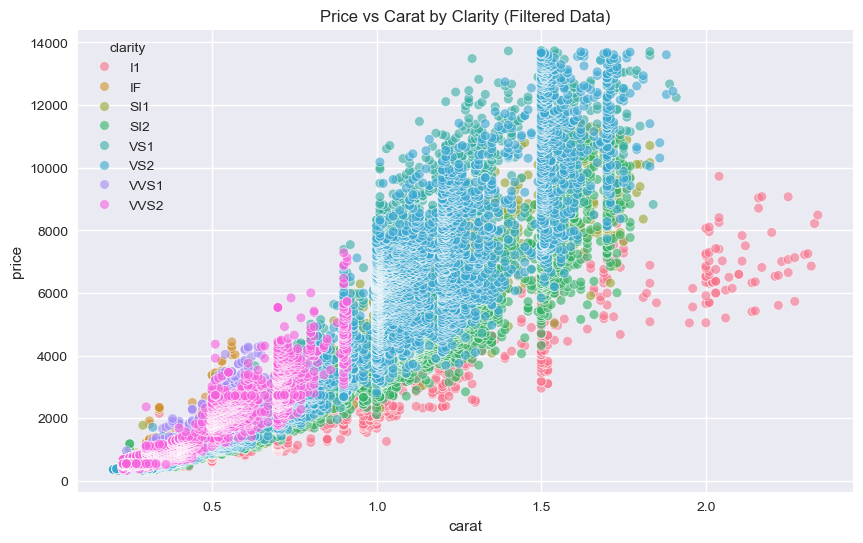

In [26]:
# Price vs Carat vs Clarity for both unfiltered and filtered data

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=diamonds_df_filtered,
    x='carat',
    y='price',
    hue='clarity',
    alpha=0.6
)
plt.title('Price vs Carat by Clarity (Filtered Data)')
plt.show()

Price rises sharply with carat across all clarity groups, with mid-tier clarities showing the most overlap (SI1, SI2, VS1, VS2), thus indicating inconsistent pricing for similar-sized stones.

### Business Questions (Support Report)

In [27]:
# What are the top three (3) clarity categories by highest median price?

median_price = (
    diamonds_df_filtered
    .groupby('clarity')['price']
    .median()
    .sort_values(ascending=False)
)

top_3_clarity = median_price.head(3)
top_3_clarity

clarity
SI2   3755.00
I1    3170.00
SI1   2575.50
Name: price, dtype: float64

The top three (3) clarity categories by highest median price are SI2 (3755.00), I1 (3170.00) and SI1 (2575.50). These three clarity categories represent the highest typical market valuation.

Median price is not sensitive to extreme values (outliers) unlike mean price.

In [28]:
# Are there any mean price/carat combinations common between the various clarity categories?

mean_combinations = (
    diamonds_df_filtered.groupby("clarity")[["price", "carat"]]
    .mean()
)

mean_combinations

,price,carat
clarity,,
I1,3422.66,1.17
IF,1145.80,0.36
SI1,3212.91,0.77
SI2,3678.57,0.92
VS1,3313.88,0.68
VS2,3301.36,0.71
VVS1,1141.25,0.37
VVS2,1463.71,0.43


Mid-tier clarities (SI1, SI2, VS1 and VS2) show very similar mean price and mean carat values, indicating that these groups are priced and sized similarly despite differences in clarity.

In contrast, the highest clarities (IF, VVS1, VVS2) have noticeably smaller mean carat sizes and correspondingly lower mean prices, reflecting their rarity in larger stones. 